In [1]:
!pip install datasets
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer
from torchvision import transforms
from PIL import Image
import torch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import io
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
dataset = pd.read_pickle("/content/tops_7000_filtered.pkl")
print(f"Loaded {len(dataset)} samples.")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system 

In [2]:

print("Unique categories in category1:")
print(dataset['category1'].unique())
categories_of_interest = ['tops']
category_labels = {
    'dresses': 0,
    'jackets': 1,
    'pants': 2,
    'skirts': 3,
    'tops': 4
}
label_table = pd.DataFrame(list(category_labels.items()), columns=["Category", "Label"])
print("\nCategory Label Mapping Table:")
print(label_table)
def clean_category(cat):
    if isinstance(cat, str):
        cat = cat.strip().lower()
        if "top" in cat or "shirt" in cat or "blouse" in cat:
            return "tops"
    return None

dataset['category1_cleaned'] =dataset['category1'].apply(clean_category)
filtered_df = dataset[dataset['category1_cleaned'].isin(categories_of_interest)].copy()
filtered_df = filtered_df.dropna(subset=['category1_cleaned'])



print("Assigning numerical labels...")
filtered_df['category_label'] = filtered_df['category1_cleaned'].map(category_labels)
print(filtered_df[['category1_cleaned', 'category_label']].head())
print(f"Number of Samples: {len(filtered_df)}")

print("Creating train/test split...")
train_df, test_df = train_test_split(
    filtered_df, test_size=0.2, random_state=42, stratify=filtered_df['category_label'])

print(f"Training set size: {len(train_df)}")
print(f"Testing set size: {len(test_df)}")

print("Preprocessing data...")
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
filtered_df.to_pickle("tops_7000_filtered.pkl")
print("Filtered dataset saved to 'tops_7000_filtered.pkl'")


Unique categories in category1:
['tops']

Category Label Mapping Table:
  Category  Label
0  dresses      0
1  jackets      1
2    pants      2
3   skirts      3
4     tops      4
Assigning numerical labels...
  category1_cleaned  category_label
0              tops               4
1              tops               4
2              tops               4
3              tops               4
4              tops               4
Number of Samples: 7000
Creating train/test split...
Training set size: 5600
Testing set size: 1400
Preprocessing data...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Filtered dataset saved to 'tops_7000_filtered.pkl'


Converting DataFrames and preprocessing...
TRAINED
Tested


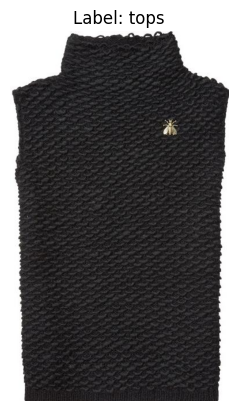

Description: black v-neck sweater with a honeycomb knit pattern. the sweater has a round neckline and is made of a soft, knit material. it is a close-fitting garment that is suitable for colder weather.
done



Sample Shapes and Sizes:
Images shape: torch.Size([5600, 3, 224, 224])
Input IDs shape: torch.Size([5600, 137])
Attention Mask shape: torch.Size([5600, 137])
Labels shape: torch.Size([5600])
Number of Training samples: 5600
Number of Testing samples: 1400

Visualizing processed data (sample):


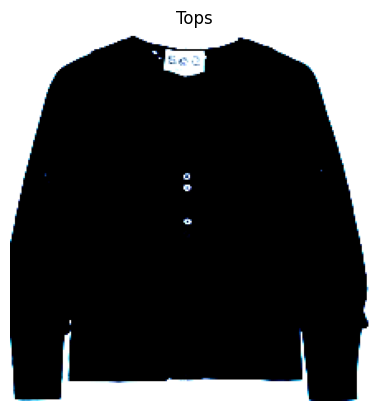

Text (Tokenized): [CLS] green and black blouse with a lace collar and a floral pattern. the blouse has long sleeves and a high neckline. the fabric is a mix of cotton and silk, and the style is a mix of bohemian and classic. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


In [3]:

def preprocess_data(examples):
    images = [transform(Image.open(io.BytesIO(ex['image']['bytes'])).convert("RGB"))
              if 'image' in ex and 'bytes' in ex['image']
              else torch.zeros(3, 224, 224)
              for ex in examples]

    texts = [ex['text'] for ex in examples]
    tokenized_texts = tokenizer(texts, padding=True, truncation=True, return_tensors='pt')
    labels = torch.tensor([ex['category_label'] for ex in examples])

    return {
        'images': torch.stack(images),
        'input_ids': tokenized_texts['input_ids'],
        'attention_mask': tokenized_texts['attention_mask'],
        'labels': labels
    }
print("Converting DataFrames and preprocessing...")
train_data = train_df.to_dict('records')
print("TRAINED")
test_data = test_df.to_dict('records')
print("Tested")

sample = filtered_df.iloc[0]
img = Image.open(io.BytesIO(sample['image']['bytes'])).convert("RGB")

plt.imshow(img)
plt.axis('off')
plt.title(f"Label: {sample['category1']}")
plt.show()

print("Description:", sample['text'])

preprocessed_train = preprocess_data(train_data)
print("done")
preprocessed_test = preprocess_data(test_data)

print("\nSample Shapes and Sizes:")
print("Images shape:", preprocessed_train['images'].shape)
print("Input IDs shape:", preprocessed_train['input_ids'].shape)
print("Attention Mask shape:", preprocessed_train['attention_mask'].shape)
print("Labels shape:", preprocessed_train['labels'].shape)

print(f"Number of Training samples: {len(preprocessed_train['labels'])}")
print(f"Number of Testing samples: {len(preprocessed_test['labels'])}")

print("\nVisualizing processed data (sample):")
def show_sample(index):
    plt.imshow(preprocessed_train['images'][index].permute(1, 2, 0))
    label_idx = int(preprocessed_train['labels'][index])
    plt.title(f"Tops")
    plt.axis('off')
    plt.show()
    print("Text (Tokenized):", tokenizer.decode(preprocessed_train['input_ids'][index]))

show_sample(0)




In [ ]:
class SmallVAE(nn.Module):
    def __init__(self, latent_dim=64):
        super(SmallVAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, 4, 2, 1), nn.ReLU(),
            nn.Conv2d(16, 32, 4, 2, 1), nn.ReLU(),
            nn.Conv2d(32, 64, 4, 2, 1), nn.ReLU(),
            nn.Flatten()
        )
        self.flatten_dim = 64 * 28 * 28
        self.fc_mu = nn.Linear(self.flatten_dim, latent_dim)
        self.fc_logvar = nn.Linear(self.flatten_dim, latent_dim)
        self.fc_decode = nn.Linear(latent_dim, self.flatten_dim)
        self.decoder = nn.Sequential(
            nn.Unflatten(1, (64, 28, 28)),
            nn.ConvTranspose2d(64, 32, 4, 2, 1), nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 4, 2, 1), nn.ReLU(),
            nn.ConvTranspose2d(16, 3, 4, 2, 1), nn.Sigmoid()
        )

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        x_encoded = self.encoder(x)
        mu = self.fc_mu(x_encoded)
        logvar = self.fc_logvar(x_encoded)
        z = self.reparameterize(mu, logvar)
        decoded = self.decoder(self.fc_decode(z))
        return decoded, mu, logvar


In [ ]:
def vae_loss(recon_x, x, mu, logvar):
    recon_loss = F.mse_loss(recon_x, x, reduction='sum')
    kl_div = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return recon_loss + kl_div


In [ ]:
def train_vae(model, data, epochs=10, batch_size=64, lr=1e-3):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    model.to(device)
    losses = []

    images = data['images']
    dataset = torch.utils.data.TensorDataset(images)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

    for epoch in range(epochs):
        total_loss = 0
        model.train()
        for batch in dataloader:
            batch = batch[0].to(device)
            optimizer.zero_grad()
            recon_batch, mu, logvar = model(batch)
            loss = vae_loss(recon_batch, batch, mu, logvar)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        avg_loss = total_loss / len(dataloader.dataset)
        losses.append(avg_loss)
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {avg_loss:.2f}")
    return losses


Using device: cuda
Epoch 1/10, Loss: 255721.00
Epoch 2/10, Loss: 206157.84
Epoch 3/10, Loss: 196170.27
Epoch 4/10, Loss: 192258.80
Epoch 5/10, Loss: 189557.30
Epoch 6/10, Loss: 187665.93
Epoch 7/10, Loss: 186057.70
Epoch 8/10, Loss: 182878.52
Epoch 9/10, Loss: 181524.90
Epoch 10/10, Loss: 180101.04


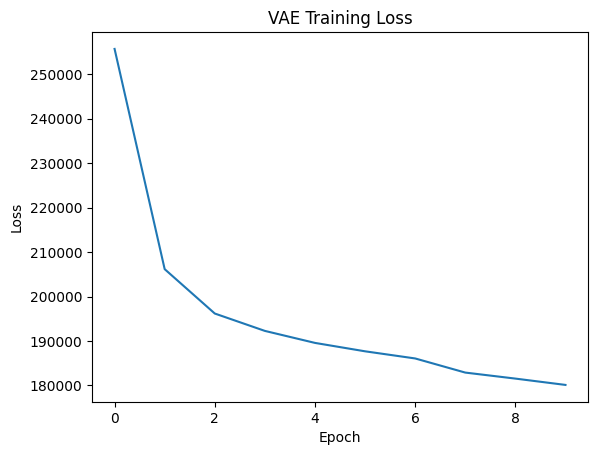

In [ ]:
preprocessed_train['images'] = preprocessed_train['images'].to(device)
preprocessed_test['images'] = preprocessed_test['images'].to(device)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

preprocessed_train['images'] = preprocessed_train['images'].to(device)
preprocessed_test['images'] = preprocessed_test['images'].to(device)

vae = SmallVAE(latent_dim=64)
losses = train_vae(vae, preprocessed_train, epochs=10, batch_size=64)

plt.plot(losses)
plt.title("VAE Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


In [ ]:

vae = SmallVAE(latent_dim=64)
vae.load_state_dict(torch.load("/content/vae_trained.pth", map_location="cuda" if torch.cuda.is_available() else "cpu"))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vae = vae.to(device)
print(f"Model loaded on: {device}")
def encode_latents(model, images, batch_size=256):
    model.eval()
    all_latents = []
    with torch.no_grad():
        for i in range(0, len(images), batch_size):
            batch = images[i:i+batch_size].to(device)
            _, mu, _ = model(batch)
    return mu
def find_most_similar(query_img, dataset_imgs, model):
    model.eval()
    with torch.no_grad():
        query_img = query_img.unsqueeze(0).to(device)
        query_latent = encode_latents(model, query_img)
        dataset_latents = encode_latents(model, preprocessed_train['images'])

        sims = F.cosine_similarity(query_latent, dataset_latents)
        top_idx = torch.argmax(sims).item()
    return top_idx, sims[top_idx].item()



Model loaded on: cuda


In [ ]:

import random

def visualize_top1_similarity(model, test_images, test_labels, train_images, train_labels, num_examples=5):
    model.eval()
    model = model.to(device)

    indices = random.sample(range(len(test_images)), num_examples)

    with torch.no_grad():
        for i in indices:
            query_img = test_images[i].unsqueeze(0).to(device)
            query_label = test_labels[i].item()
            _, query_mu, _ = model(query_img)

            similarities = []
            for j in range(0, len(train_images), 256):
                batch = train_images[j:j+256].to(device)
                batch_labels = train_labels[j:j+256]
                _, batch_mu, _ = model(batch)
                sims = F.cosine_similarity(query_mu, batch_mu)
                similarities.extend(zip(sims.tolist(), batch_labels.tolist(), range(j, j+len(batch))))
            most_similar = sorted(similarities, key=lambda x: x[0], reverse=True)[0]
            sim_score, matched_label, matched_index = most_similar

            plt.figure(figsize=(8, 4))

            plt.subplot(1, 2, 1)
            plt.imshow(test_images[i].cpu().permute(1, 2, 0))
            plt.title(f"Query (Label: {query_label})")
            plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.imshow(train_images[matched_index].cpu().permute(1, 2, 0))
            plt.title(f"Match (Label: {matched_label})\nSimilarity: {sim_score:.2f}")
            plt.axis('off')

            plt.show()




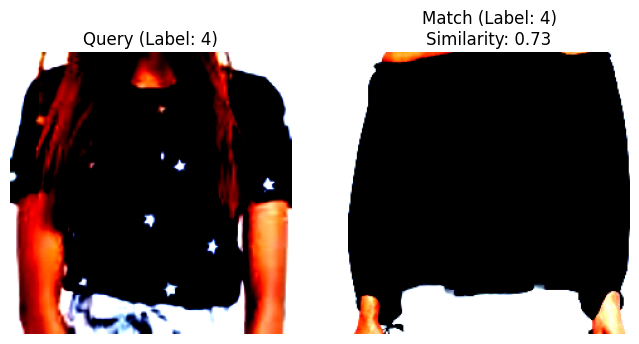

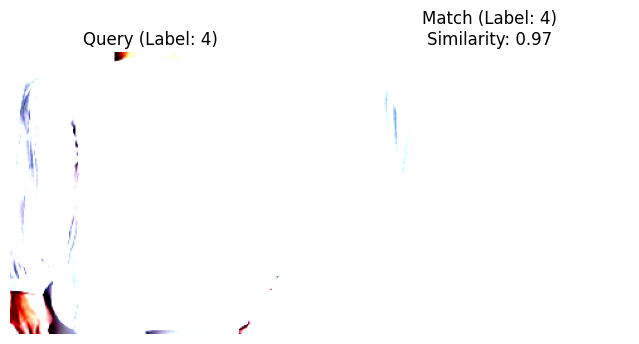

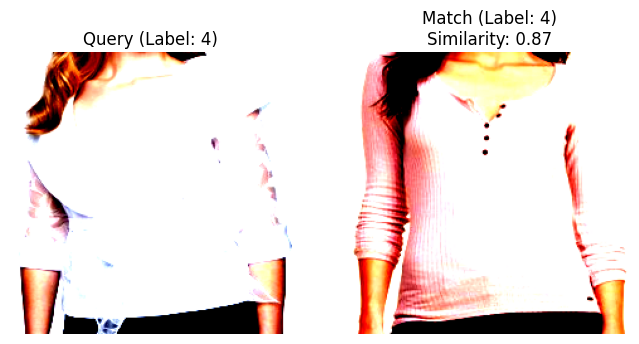

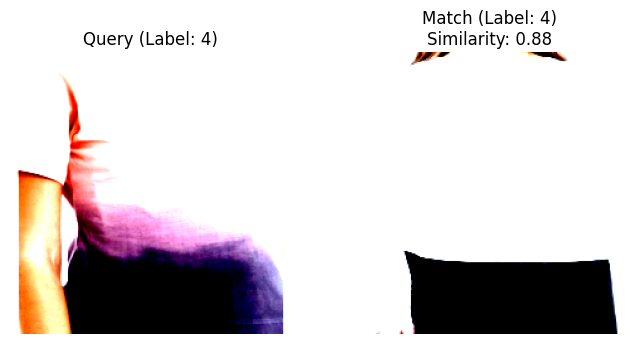

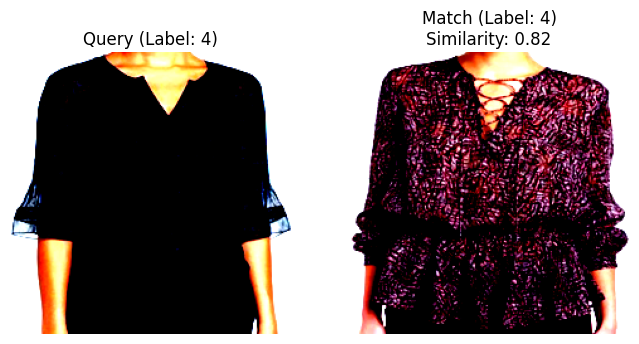

In [ ]:
visualize_top1_similarity(
    model=vae,
    test_images=preprocessed_test['images'],
    test_labels=preprocessed_test['labels'],
    train_images=preprocessed_train['images'],
    train_labels=preprocessed_train['labels'],
    num_examples=5
)


In [4]:
from transformers import BertModel

class SimpleCLIP(nn.Module):
    def __init__(self, image_embed_dim=256, text_embed_dim=256):
        super().__init__()

        self.image_encoder = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=2),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(32, image_embed_dim)
        )

        self.text_encoder = BertModel.from_pretrained('bert-base-uncased')
        self.text_proj = nn.Linear(self.text_encoder.config.hidden_size, text_embed_dim)

    def encode_image(self, images):
        return F.normalize(self.image_encoder(images), dim=-1)

    def encode_text(self, input_ids, attention_mask):
        out = self.text_encoder(input_ids=input_ids, attention_mask=attention_mask)
        cls_embedding = out.last_hidden_state[:, 0]
        return F.normalize(self.text_proj(cls_embedding), dim=-1)

    def forward(self, images, input_ids, attention_mask):
        img_embed = self.encode_image(images)
        txt_embed = self.encode_text(input_ids, attention_mask)
        return img_embed, txt_embed


In [3]:
def clip_loss(image_embeds, text_embeds, temperature=0.07):
    logits = image_embeds @ text_embeds.T / temperature
    labels = torch.arange(len(image_embeds)).to(image_embeds.device)
    loss_i2t = F.cross_entropy(logits, labels)
    loss_t2i = F.cross_entropy(logits.T, labels)
    return (loss_i2t + loss_t2i) / 2


In [ ]:
from torch.cuda.amp import autocast, GradScaler

def train_clip_model(model, train_loader, device, epochs=15, lr=1e-4):
    model = model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    scaler = GradScaler()

    for epoch in range(epochs):
        model.train()
        total_loss = 0

        for batch in train_loader:
            images, input_ids, attention_mask = [x.to(device) for x in batch]

            optimizer.zero_grad()

            with autocast():
                img_emb, txt_emb = model(images, input_ids, attention_mask)
                loss = clip_loss(img_emb, txt_emb)

            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()

            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader)
        print(f"Epoch {epoch+1}/{epochs} | Avg Loss: {avg_loss:.4f}")


In [ ]:
from torch.utils.data import DataLoader, TensorDataset

train_dataset = TensorDataset(
    preprocessed_train['images'],
    preprocessed_train['input_ids'],
    preprocessed_train['attention_mask']
)

train_loader = DataLoader(
    train_dataset,
    batch_size=16,
    shuffle=True,
    pin_memory=True,
    num_workers=2
)


In [ ]:
model = SimpleCLIP().to(device)
train_clip_model(model, train_loader, device=device, epochs=15)


<ipython-input-6-18123a66b455>:6: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()  # For mixed precision
<ipython-input-6-18123a66b455>:17: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():  # Enable mixed precision


Epoch 1/15 | Avg Loss: 1.9778
Epoch 2/15 | Avg Loss: 1.4962
Epoch 3/15 | Avg Loss: 1.2911
Epoch 4/15 | Avg Loss: 1.1452
Epoch 5/15 | Avg Loss: 1.0398
Epoch 6/15 | Avg Loss: 0.9373
Epoch 7/15 | Avg Loss: 0.8546
Epoch 8/15 | Avg Loss: 0.7582
Epoch 9/15 | Avg Loss: 0.7082
Epoch 10/15 | Avg Loss: 0.6394
Epoch 11/15 | Avg Loss: 0.5709
Epoch 12/15 | Avg Loss: 0.5874
Epoch 13/15 | Avg Loss: 1.5997
Epoch 14/15 | Avg Loss: 2.7805
Epoch 15/15 | Avg Loss: 2.7774


In [7]:
def retrieve_image_from_text_batched(model, text_query, train_images, tokenizer, batch_size=128, top_k=1):
    model.eval()
    sims_all = []
    image_indices = []

    with torch.no_grad():
        tokens = tokenizer(text_query, return_tensors="pt").to(device)
        text_embed = model.encode_text(tokens['input_ids'], tokens['attention_mask'])

        for i in range(0, len(train_images), batch_size):
            image_batch = train_images[i:i+batch_size].to(device)
            image_embeds = model.encode_image(image_batch)
            sims = F.cosine_similarity(text_embed, image_embeds)

            sims_all.extend(sims.cpu().tolist())
            image_indices.extend(range(i, i+len(image_batch)))
        sims_tensor = torch.tensor(sims_all)
        top_indices = torch.topk(sims_tensor, k=top_k).indices
        return [image_indices[i] for i in top_indices]


In [5]:
model = SimpleCLIP().to(device)
model.load_state_dict(torch.load("/content/clip_model.pth", map_location=device))
model.eval()


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

SimpleCLIP(
  (image_encoder): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU()
    (2): AdaptiveAvgPool2d(output_size=(1, 1))
    (3): Flatten(start_dim=1, end_dim=-1)
    (4): Linear(in_features=32, out_features=256, bias=True)
  )
  (text_encoder): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=76

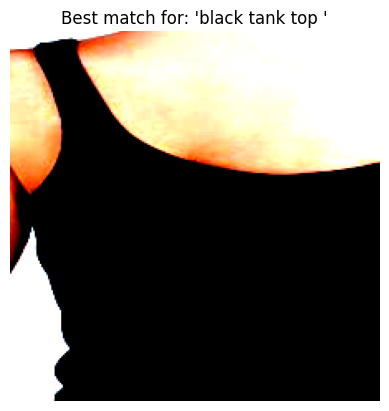

In [8]:
query = "black tank top "
top_img_idxs = retrieve_image_from_text_batched(
    model, query, preprocessed_train['images'], tokenizer
)

plt.imshow(preprocessed_train['images'][top_img_idxs[0]].permute(1, 2, 0).cpu())
plt.axis('off')
plt.title(f"Best match for: '{query}'")
plt.show()



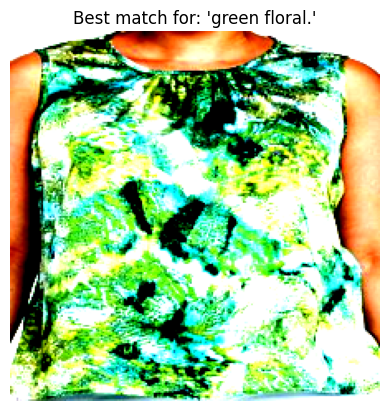

In [ ]:
query = "green floral."
top_img_idxs = retrieve_image_from_text_batched(
    model, query, preprocessed_train['images'], tokenizer
)

plt.imshow(preprocessed_train['images'][top_img_idxs[0]].permute(1, 2, 0).cpu())
plt.axis('off')
plt.title(f"Best match for: '{query}'")
plt.show()


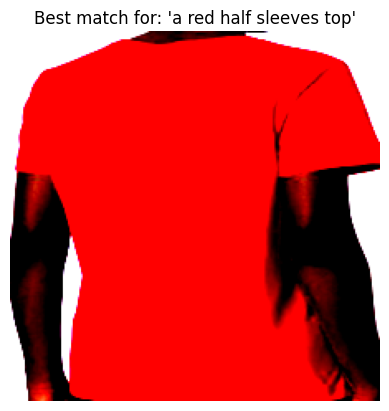

In [ ]:
query = "a red half sleeves top"
top_img_idxs = retrieve_image_from_text_batched(
    model, query, preprocessed_train['images'], tokenizer
)
plt.imshow(preprocessed_train['images'][top_img_idxs[0]].permute(1, 2, 0).cpu())
plt.axis('off')
plt.title(f"Best match for: '{query}'")
plt.show()


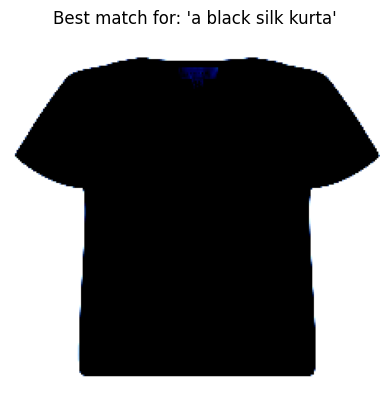

In [9]:
query = "a black silk kurta"
top_img_idxs = retrieve_image_from_text_batched(
    model, query, preprocessed_train['images'], tokenizer
)
plt.imshow(preprocessed_train['images'][top_img_idxs[0]].permute(1, 2, 0).cpu())
plt.axis('off')
plt.title(f"Best match for: '{query}'")
plt.show()


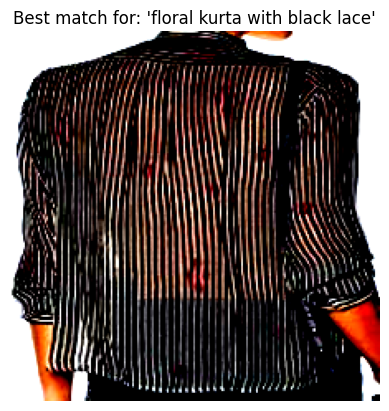

In [28]:
query = "floral kurta with black lace"
top_img_idxs = retrieve_image_from_text_batched(
    model, query, preprocessed_train['images'], tokenizer
)
plt.imshow(preprocessed_train['images'][top_img_idxs[0]].permute(1, 2, 0).cpu())
plt.axis('off')
plt.title(f"Best match for: '{query}'")
plt.show()

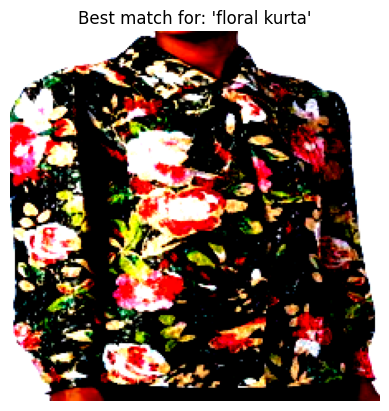

In [29]:
query = "floral kurta"
top_img_idxs = retrieve_image_from_text_batched(
    model, query, preprocessed_train['images'], tokenizer
)
plt.imshow(preprocessed_train['images'][top_img_idxs[0]].permute(1, 2, 0).cpu())
plt.axis('off')
plt.title(f"Best match for: '{query}'")
plt.show()

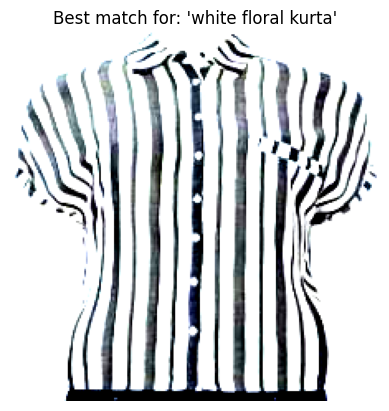

In [30]:
query = "white floral kurta"
top_img_idxs = retrieve_image_from_text_batched(
    model, query, preprocessed_train['images'], tokenizer
)
plt.imshow(preprocessed_train['images'][top_img_idxs[0]].permute(1, 2, 0).cpu())
plt.axis('off')
plt.title(f"Best match for: '{query}'")
plt.show()

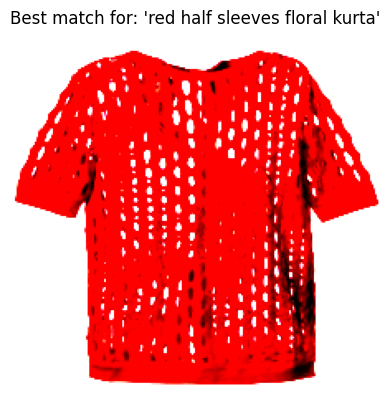

In [33]:
query = "red half sleeves floral kurta"
top_img_idxs = retrieve_image_from_text_batched(
    model, query, preprocessed_train['images'], tokenizer
)
plt.imshow(preprocessed_train['images'][top_img_idxs[0]].permute(1, 2, 0).cpu())
plt.axis('off')
plt.title(f"Best match for: '{query}'")
plt.show()

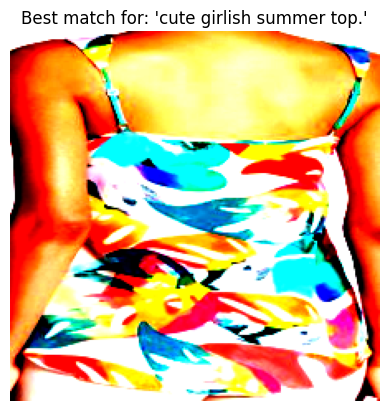

In [46]:
query = "cute girlish summer top."
top_img_idxs = retrieve_image_from_text_batched(
    model, query, preprocessed_train['images'], tokenizer
)
plt.imshow(preprocessed_train['images'][top_img_idxs[0]].permute(1, 2, 0).cpu())
plt.axis('off')
plt.title(f"Best match for: '{query}'")
plt.show()

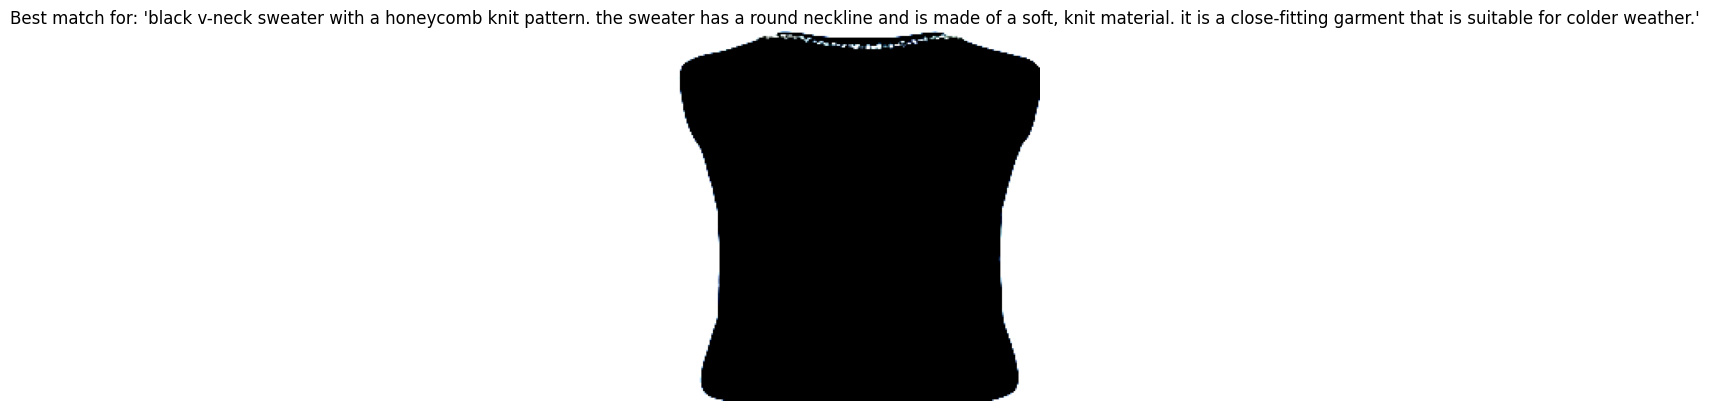

In [47]:
query = "black v-neck sweater with a honeycomb knit pattern. the sweater has a round neckline and is made of a soft, knit material. it is a close-fitting garment that is suitable for colder weather."
top_img_idxs = retrieve_image_from_text_batched(
    model, query, preprocessed_train['images'], tokenizer
)
plt.imshow(preprocessed_train['images'][top_img_idxs[0]].permute(1, 2, 0).cpu())
plt.axis('off')
plt.title(f"Best match for: '{query}'")
plt.show()
